# SMS SPAM CLASSIFIER:Naive Bayes and Support Vector Machine 

In [1]:
import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC 
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix

In [2]:
df=pd.read_csv(r'C:\Users\hp\Documents\Spam Classifier\spam.csv',encoding='latin-1')  #shape=(5572,5)
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
df=df[['v1','v2']]
df=df.rename(columns={'v1':'label','v2':'sms'})

In [4]:
df.tail()

,label,sms
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [5]:
df.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [6]:
df.describe()

,label,sms
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [7]:
df['length']=df['sms'].apply(lambda x: len(x))
df.head()

,label,sms,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


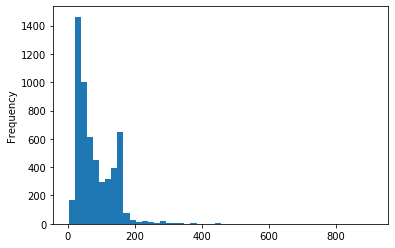

In [8]:
df['length'].plot(bins=50,kind='hist')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000207CA6A32B0>,
      dtype=object)

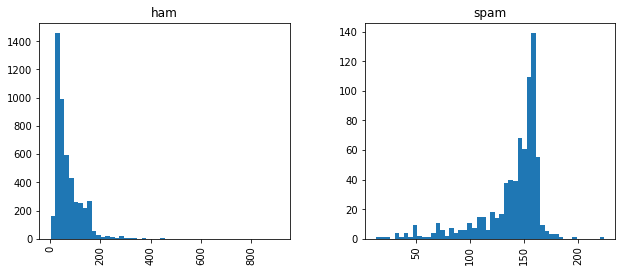

In [9]:
df.hist(column='length',by='label',bins=50,figsize=(10,4))

In [10]:
mp={'spam':1,'ham':0}
df['label']=df['label'].map(mp)
df.head()

,label,sms,length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


## Bag of Words approach

We need a way to represent text data for machine learning algorithm and the bag-of-words model helps us to achieve that task. It is a way of extracting features from the text for use in machine learning algorithms. In this approach, we use the tokenized words for each observation and find out the frequency of each token. Using a process which we will go through now, we can convert a collection of documents to a matrix, with each document being a row and each word(token) being the column, and the corresponding (row,column) values being the frequency of occurrence of each word or token in that document.

To handle this, we will be using sklearn's CountVectorizer method which does the following:

1. It tokenizes the string(separates the string into individual words) and gives an integer ID to each token.
2. It counts the occurrence of each of those tokens.

### Implementation of the BOW Approach
1. Convert all strings to their lowercase form
2. Remove all punctuations
3. Tokenization
4. Count Frequencies

In [11]:
documents=["Hello, how are you?","Win money,win from home.","Call me now.","Hello! Can call you tomorrow?"]   ### Lowercase
lower_case=[str.lower(i) for i in documents]
lower_case

['hello, how are you?',
 'win money,win from home.',
 'call me now.',
 'hello! can call you tomorrow?']

In [12]:
import string                      ### Removing Punctuations
without_punc=[i.translate(str.maketrans("","",string.punctuation)) for i in lower_case]
without_punc

['hello how are you',
 'win moneywin from home',
 'call me now',
 'hello can call you tomorrow']

In [13]:
preprocessed=[[i for i in d.split()] for d in without_punc]  ### Tokenization
preprocessed

[['hello', 'how', 'are', 'you'],
 ['win', 'moneywin', 'from', 'home'],
 ['call', 'me', 'now'],
 ['hello', 'can', 'call', 'you', 'tomorrow']]

In [14]:
import pprint                      ### Count Vectorization
from collections import Counter
freq_list=[Counter(d) for d in preprocessed]
pprint.pprint(freq_list)

[Counter({'hello': 1, 'how': 1, 'are': 1, 'you': 1}),
 Counter({'win': 1, 'moneywin': 1, 'from': 1, 'home': 1}),
 Counter({'call': 1, 'me': 1, 'now': 1}),
 Counter({'hello': 1, 'can': 1, 'call': 1, 'you': 1, 'tomorrow': 1})]


In [15]:
count_vector=CountVectorizer()
count_vector.fit(documents)
count_vector.get_feature_names()

['are',
 'call',
 'can',
 'from',
 'hello',
 'home',
 'how',
 'me',
 'money',
 'now',
 'tomorrow',
 'win',
 'you']

In [16]:
doc_array=count_vector.transform(documents).toarray()
doc_array

array([[1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 2, 0],
       [0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0],
       [0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1]], dtype=int64)

In [17]:
freq_matrix=pd.DataFrame(doc_array,columns=count_vector.get_feature_names())
freq_matrix

,are,call,can,from,hello,home,how,me,money,now,tomorrow,win,you
0,1,0,0,0,1,0,1,0,0,0,0,0,1
1,0,0,0,1,0,1,0,0,1,0,0,2,0
2,0,1,0,0,0,0,0,1,0,1,0,0,0
3,0,1,1,0,1,0,0,0,0,0,1,0,1


### Now coming back to where we were...

A Naive Bayes Classifier is a supervised machine learning algorithm that uses the Bayes' Theorem which assumes that features are statistically independent.The theorem relies on the assumption that input variables are independent of each other,i.e., there is no way to know anything about other variables when given an additional variable. 

In [18]:
X_train,X_test,y_train,y_test=train_test_split(df['sms'],df['label'],test_size=0.20)

In [19]:
X_train.shape,X_test.shape

((4457,), (1115,))

In [20]:
count_vector=CountVectorizer()
train=count_vector.fit_transform(X_train)
test=count_vector.transform(X_test)

# Naive Bayes Model

In [21]:
naive_bayes=MultinomialNB()
naive_bayes.fit(train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [22]:
prediction_naive=naive_bayes.predict(test)

## Evaluation of the model

Accuracy measures how often the classifier makes the correct prediction. It’s the ratio of the number of correct predictions to the total number of predictions (the number of test data points).

Precision tells us what proportion of messages we classified as spam, actually were spam. It is a ratio of true positives(words classified as spam, and which are actually spam) to all positives(all words classified as spam, irrespective of whether that was the correct classification), in other words it is the ratio of

[True Positives/(True Positives + False Positives)]

Recall(sensitivity) tells us what proportion of messages that actually were spam were classified by us as spam. It is a ratio of true positives(words classified as spam, and which are actually spam) to all the words that were actually spam, in other words it is the ratio of

[True Positives/(True Positives + False Negatives)]

In [23]:
print('Accuracy score: {}'.format(accuracy_score(y_test,prediction_naive)))
print('Precision score: {}'.format(precision_score(y_test,prediction_naive)))
print('Recall score: {}'.format(recall_score(y_test,prediction_naive)))
print('F1 score: {}'.format(f1_score(y_test,prediction_naive)))

Accuracy score: 0.9937219730941704
Precision score: 0.9915966386554622
Recall score: 0.9516129032258065
F1 score: 0.9711934156378601


One of the major advantages that Naive Bayes has over other classification algorithms is its ability to handle an extremely large number of features. In our case, each word is treated as a feature and there are thousands of different words. Also, it performs well even with the presence of irrelevant features and is relatively unaffected by them.

The other major advantage it has is its relative simplicity. Naive Bayes' works well right out of the box and tuning it's parameters is rarely ever necessary, except usually in cases where the distribution of the data is known.

It rarely ever overfits the data.

Another important advantage is that its model training and prediction times are very fast for the amount of data it can handle.

### Confusion matrix with Naive Bayes Classifier

If a spam message comes in my inbox,I can delete it but if a non_spam is classified as spam,I may not be able to read it and it may have been important.So we do not want to have false positives.

In [24]:
m_confusion=confusion_matrix(y_test,prediction_naive)
mat=pd.DataFrame(m_confusion,columns=['Predicted 0','Predicted 1'],index=['Actual 0','Actual 1'])
mat

,Predicted 0,Predicted 1
Actual 0,990,1
Actual 1,6,118


# SVM Model

In [25]:
svc=SVC(kernel='linear')
svc.fit(train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [26]:
prediction_svm=svc.predict(test)

## Evaluation of the model 

In [27]:
print('Accuracy score: {}'.format(accuracy_score(y_test,prediction_svm)))
print('Precision score: {}'.format(precision_score(y_test,prediction_svm)))
print('Recall score: {}'.format(recall_score(y_test,prediction_svm)))
print('F1 score: {}'.format(f1_score(y_test,prediction_svm)))

Accuracy score: 0.9883408071748879
Precision score: 0.9826086956521739
Recall score: 0.9112903225806451
F1 score: 0.9456066945606695


### Confusion matrix with SVC

In [28]:
M_confusion=confusion_matrix(y_test,prediction_svm)
Mat=pd.DataFrame(M_confusion,columns=['Predicted 0','Predicted 1'],index=['Actual 0','Actual 1'])
Mat

,Predicted 0,Predicted 1
Actual 0,989,2
Actual 1,11,113


## Conclusion

The Naive Bayes model had a total F1 score of 0.9712 and proved to be a better model than SVM in this regard which had a F1 score of 0.9456. Also,the False positives in case of Naive Bayes were 1 as compared to SVM's 2 out of a total of 991.

Therefore, both models fit very vell and perform exceptionally on the given dataset and are quite handy to be taken as the preferred choice for Spam Classification.